In [19]:
from tabgen.definitions import *

In [4]:
columns = [col for col in pd.read_csv(Path.FEATURE_FILE, nrows=0).columns]
columns = [col for col in pd.read_csv('./data/_cost_all_chord/training_data.csv', nrows=0).columns]

In [13]:
[col for col in columns
 if col not in pitch_sparse
 and col not in string_fret_sparse
 and col not in probabilities
 and col not in heuristics
 and col not in string_played
 and col not in pitch_vector
 and col not in string_numfret
 and col not in pitch_descr
]

['correlation_coefficient',
 'count',
 'duration',
 'fret_25%',
 'fret_50%',
 'fret_75%',
 'fret_max',
 'fret_mean',
 'fret_min',
 'fret_range',
 'fret_std',
 'is_chord',
 'is_note',
 'is_rest',
 'string_25%',
 'string_50%',
 'string_75%',
 'string_max',
 'string_mean',
 'string_min',
 'string_range',
 'string_std']

In [12]:
select_columns = lambda x: [col for col in columns if x(col)]
pitch_sparse = select_columns(lambda col: col.find('has_pitch')>-1)
pitch_vector = select_columns(lambda col: col.find('pitch_')>-1 and col.find('has_pitch')==-1 and col.find('string')==-1)
pitch_descr = select_columns(lambda col: col.find('pitches_')>-1)
string_fret_sparse = select_columns(lambda col: col.find('string')>-1 and col.find('fret')>-1 and col.find('played')>-1)
string_numfret = select_columns(lambda col: col.find('string')>-1 and col.find('fret')>-1 and col.find('played')==-1)
string_played = select_columns(lambda col: col.find('string')>-1 and col.find('played')>-1 and col.find('fret')==-1)
probabilities = select_columns(lambda col: col.startswith('prob'))
heuristics = select_columns(lambda col: col.startswith('heuristic'))

['next_pitches_25%',
 'next_pitches_50%',
 'next_pitches_75%',
 'next_pitches_max',
 'next_pitches_mean',
 'next_pitches_min',
 'next_pitches_range',
 'next_pitches_std']

In [21]:
data = pd.read_csv('./data/training_data.csv')
data.describe()

,correlation_coefficient,fret_25%,fret_50%,fret_75%,fret_max,fret_mean,fret_min,fret_range,fret_std,next_pitches_25%,...,next_pitches_std,string_25%,string_50%,string_75%,string_max,string_mean,string_min,string_range,string_std,probs_1
count,257194.000000,257194.000000,257194.000000,257194.000000,257194.000000,257194.000000,257194.000000,257194.000000,257194.000000,257194.000000,...,257194.000000,257194.000000,257194.000000,257194.000000,257194.000000,257194.000000,257194.000000,257194.000000,257194.000000,257194.0
mean,0.089481,4.651371,4.838655,4.964587,5.063823,4.793732,4.469708,0.594116,0.272229,49.311732,...,1.207870,2.665771,2.805909,2.945108,3.084454,2.805265,2.525203,0.559251,0.224652,1.0
std,0.376409,4.520049,4.514502,4.530821,4.569345,4.500682,4.562842,1.553566,0.702581,13.424833,...,2.274489,1.531121,1.544281,1.607639,1.716011,1.543825,1.570830,1.137066,0.429702,0.0
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,1.000000,1.000000,2.000000,2.000000,1.200000,0.000000,0.000000,0.000000,40.000000,...,0.000000,1.250000,1.500000,1.750000,2.000000,1.500000,1.000000,0.000000,0.000000,1.0
50%,0.000000,3.500000,4.000000,4.000000,4.000000,4.000000,3.000000,0.000000,0.000000,48.750000,...,0.000000,2.250000,2.500000,2.750000,3.000000,2.500000,2.000000,0.000000,0.000000,1.0
75%,0.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,0.000000,0.000000,59.000000,...,1.500000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000,0.500000,1.0
max,1.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,21.000000,10.500000,88.000000,...,21.500000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,5.000000,2.500000,1.0


In [22]:
# remove columns from data table
import pandas as pd

data = pd.read_csv('./data/training_data.csv')
data.drop(
    [col for col in data.columns if col.find('std')>-1],
    axis=1, inplace=True
)
data.to_csv('./data/training_data.csv', index=False)

In [14]:
# get the probabilities from preprocessing
prob_read = [(np.fromstring(kk, dtype=np.float32), vv) for kk, vv in np.load('./data/probabilities_1.npy').tolist().items()]
# [p[1] for p in prob_read]

[(array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  1.875     ,  0.        ,  2.        ,
          0.        ,  0.        ,  0.        ,  1.875     ,  0.        ,
          2.        ,  0.        ,  1.9375    ,  0.        ,  1.875     ,
          0.        ,  1.75      ,  0.        ,  0.        ,  0.        ,
          2.125     ,  2.        ,  2.02028465,  0.        ,  1.875     ,
          0.        ,  1.875     ,  0.        ,  0.        ,  0.        ,
         -1.875     ,  0.        , -2.        ,  0.        ,  2.        ,
          0.        ,  1.875     ,  0.        ,  0.        ,  0.        ,
          1.75      ,  0.        ,  1.875     ,  0.        ,  1.9375    ,
          0.        , -0.01953125,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.

In [18]:
prob = np.load('./data/probabilities_1.npy').tolist()
len(prob)

25795

In [9]:
data = pd.read_csv(Path.FEATURE_FILE, nrows=1000)
data.describe()

,correlation_coefficient,fret_25%,fret_50%,fret_75%,fret_max,fret_mean,fret_min,fret_range,fret_std,heuristic_all_zero,...,next_pitches_std,string_25%,string_50%,string_75%,string_max,string_mean,string_min,string_range,string_std,probs_1
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.145094,2.241250,2.381500,2.560750,2.752000,2.406333,2.082000,0.670000,0.322181,0.391000,...,1.610300,3.214250,3.416000,3.613250,3.810000,3.412667,3.011000,0.799000,0.353363,0.973000
std,0.433173,3.154947,3.227014,3.328431,3.502965,3.209194,3.110458,1.700586,0.837655,0.488219,...,2.458266,1.066265,1.083336,1.177497,1.332545,1.080991,1.139376,1.215762,0.535183,0.120140
min,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006667
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,3.250000,3.500000,4.000000,4.000000,3.500000,3.000000,0.000000,0.000000,1.000000
75%,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,0.250000,0.117851,1.000000,...,3.681787,3.750000,4.000000,4.500000,5.000000,4.000000,3.000000,2.000000,0.816497,1.000000
max,1.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,11.000000,5.500000,1.000000,...,10.984838,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,2.160247,1.000000


# Older Tests

In [6]:
def evaluate_models(X,Y):
    from sklearn.model_selection import KFold
    
    from sklearn.neural_network import MLPRegressor
    from sklearn.linear_model import LinearRegression
    from sklearn.neighbors import KNeighborsRegressor

    # define models to evaluate
    models = [
        LinearRegression(),
        #KNeighborsRegressor(),
        MLPRegressor(hidden_layer_sizes=(100,50,25)),
        #MLPRegressor(hidden_layer_sizes=(100,50,25),activation='logistic'),
    ]

    # start empty arrays for models
    scores = {}
    for model in models:
        scores[str(model)] = []

    # evaluate with CV
    n_splits = 5
    kf = KFold(n_splits=n_splits)
    for train, valid in tqdm(kf.split(X,Y),desc='Cross-validating',total=n_splits):
        for model in models:
            model.fit(X.iloc[train],Y.iloc[train])
            scores[str(model)].append( model.score(X.iloc[valid],Y.iloc[valid]) )

    scores = pd.DataFrame(scores)
    return scores

In [7]:
scores = evaluate_models(X,Y)

Cross-validating:   0%|          | 0/5 [00:00<?, ?it/s]/afs/inf.ed.ac.uk/user/s16/s1675946/virtualenvs/iaml_env/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1266: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
Cross-validating: 100%|██████████| 5/5 [01:16<00:00, 15.49s/it]


In [8]:
scores.describe().T[['mean','std']]#,'min','max']]

,mean,std
"LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)",0.051215,0.002322
"MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,\n beta_2=0.999, early_stopping=False, epsilon=1e-08,\n hidden_layer_sizes=(100, 50, 25), learning_rate='constant',\n learning_rate_init=0.001, max_iter=200, momentum=0.9,\n nesterovs_momentum=True, power_t=0.5, random_state=None,\n shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,\n verbose=False, warm_start=False)",0.126534,0.011473


In [8]:
# try again with PCA
#from sklearn.decomposition import KernelPCA
from sklearn.decomposition.incremental_pca import IncrementalPCA

pca = IncrementalPCA().fit(X)

(X_pca,X_pca_test) = train_test_split(X)

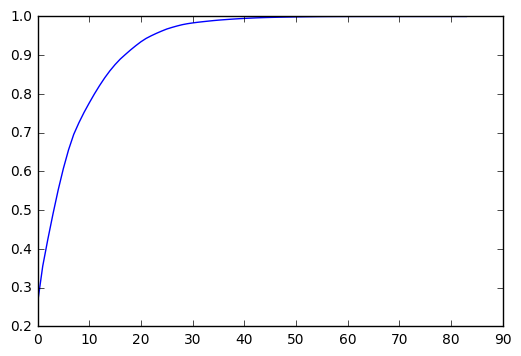

In [9]:
# look at PCA components
from matplotlib import pyplot as plt
plt.plot( np.cumsum(pca.explained_variance_ratio_) )
plt.show()

In [10]:
# reduce dimensionality
pca_components = 40
X_pca = pd.DataFrame( pca.transform(X)[:,:pca_components] )
print 'keeping variance: {}'.format(np.sum(pca.explained_variance_ratio_[:pca_components]))

keeping variance: 0.994182832311


In [11]:
scores_pca = evaluate_models(X_pca,Y)

Cross-validating: 100%|██████████| 5/5 [07:40<00:00, 87.11s/it]


In [13]:
scores_pca.describe().T[['mean','std']]#,'min','max']]

,mean,std
"LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)",0.067186,0.006516
"MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,\n beta_2=0.999, early_stopping=False, epsilon=1e-08,\n hidden_layer_sizes=(100, 50, 25), learning_rate='constant',\n learning_rate_init=0.001, max_iter=200, momentum=0.9,\n nesterovs_momentum=True, power_t=0.5, random_state=None,\n shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,\n verbose=False, warm_start=False)",0.058670,0.024829
